In [1]:
import numpy as np
import visualization
from NeuralNetwork import*
np.random.seed(1)

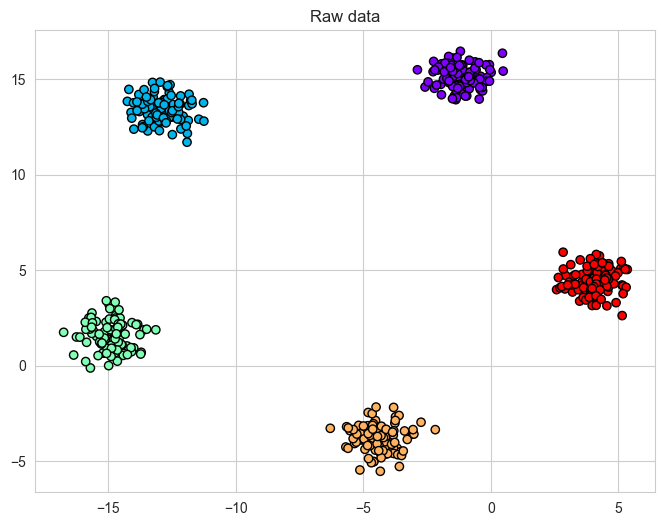

In [2]:
# load data
data = np.loadtxt('tren_data1___09.txt')
# data = np.loadtxt('tren_data2___09.txt')

visualization.plot_data(data, title='Raw data')

In [3]:
# shuffle data
data = np.random.permutation(data)
data_train = data[:int(len(data)*0.8)]
data_test = data[int(len(data)*0.8):]
x_train = data_train[:,:-1].T
y_train_raw = data_train[:,-1]
x_test = data_test[:,:-1].T
y_test = data_test[:,-1]
num_classes = len(np.unique(y_train_raw))

# to one hot

y_train = DNNClassifier.to_one_hot(y_train_raw, num_classes)
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print ('Number of training examples: ', x_train.shape[1])
print ('Number of testing examples: ', x_test.shape[1])
print ('------')
print ('x_train shape: ', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_test shape: ', y_test.shape)
print ('------')
print ('Number of classes: ', num_classes)

Number of training examples:  400
Number of testing examples:  100
------
x_train shape:  (2, 400)
y_train shape:  (5, 400)
x_test shape:  (2, 100)
y_test shape:  (1, 100)
------
Number of classes:  5


# Multi-class classification

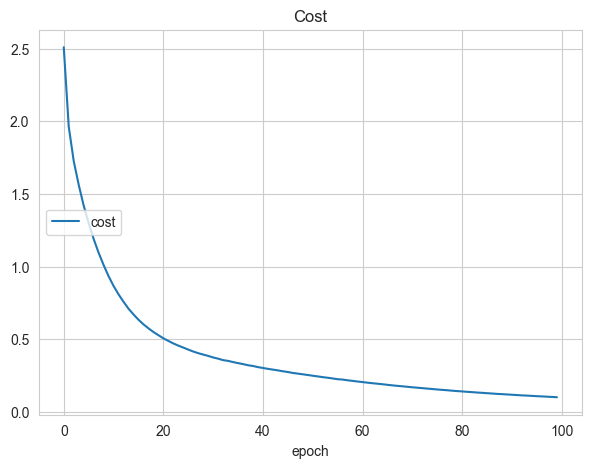

Cost after epoch 99: 0.004571792086049981


In [5]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer,12, 6, 5] # set layer number and sizes

# parameters, costs = model(x_train, y_train, dims, learning_rate=0.0075, epochs = 2000, print_cost = True)
nn = DNNClassifier(dims, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.softmax])
# costs = nn.train(x_train, y_train, learning_rate=0.0075, epochs = 100, batch_size=10, print_cost = True)
costs = nn.train(x_train, y_train, learning_rate=0.00006, epochs = 100, batch_size=1, print_cost = True)

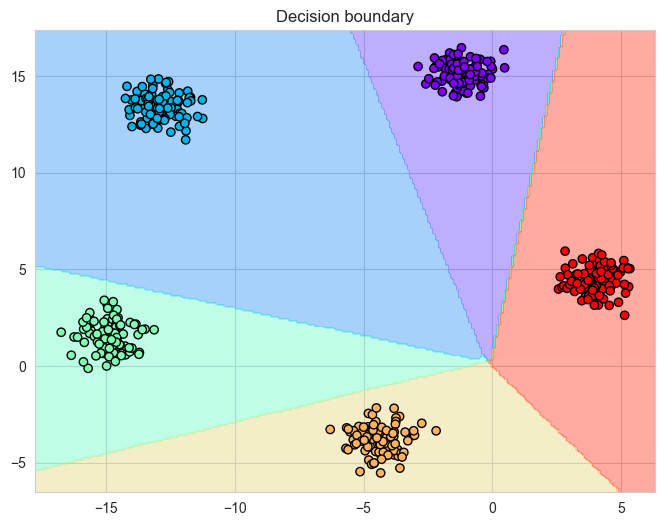

In [6]:
visualization.plot_decision_boundary(data, nn, title='Decision boundary')


In [7]:
A = nn.forward_propagation(x_test)

accuracy:        1.0
confusion matrix: 


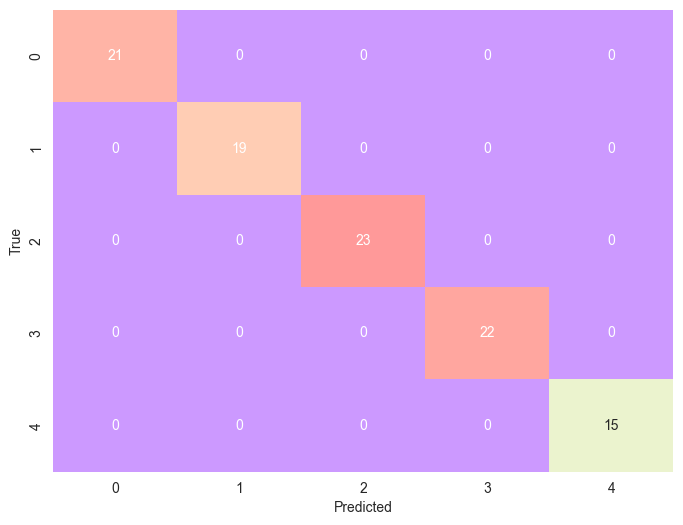

In [8]:
accuracy, confusion_matrix = nn.evaluate(x_test, y_test, confusion_matrix=True)
print('accuracy:       ', accuracy)
print('confusion matrix: ')
visualization.plot_confusion_matrix(confusion_matrix)

In [9]:
nn.activations

[<function NeuralNetwork.DNNClassifier.relu(Z, derivative=False)>,
 <function NeuralNetwork.DNNClassifier.relu(Z, derivative=False)>,
 <function NeuralNetwork.DNNClassifier.softmax(Z, derivative=False)>]

# One vs all

In [10]:
input_layer = x_train.shape[0] # set input layer size
dims = [input_layer,2, 1] # set layer number and sizes


In [11]:
one_vs_all_nn = OneVsAllClassifier(dims, [DNNClassifier.sigmoid, DNNClassifier.sigmoid], num_classes)
one_vs_all_nn.train(x_train, y_train_raw, learning_rate=0.06, epochs = 100, batch_size=5, print_cost = True)

Training classifier 0...
Training model...
Cost after epoch 0: 0.532014020411752
Cost after epoch 1: 0.4368885016292342
Cost after epoch 2: 0.4707777352002469
Cost after epoch 3: 0.4343671093618916
Cost after epoch 4: 0.44333143468537795
Cost after epoch 5: 0.3684961649614896
Cost after epoch 6: 0.05657669292923111
Cost after epoch 7: 0.3832701931284815
Cost after epoch 8: 0.2936139739401336
Cost after epoch 9: 0.07467404985614359
Cost after epoch 10: 0.07140832347323256
Cost after epoch 11: 0.1303203716245403
Cost after epoch 12: 0.16618517141959668
Cost after epoch 13: 0.11660586295062755
Cost after epoch 14: 0.18148186186928605
Cost after epoch 15: 0.17216329511039102
Cost after epoch 16: 0.09238981465252624
Cost after epoch 17: 0.2776820824732494
Cost after epoch 18: 0.12116050237979384
Cost after epoch 19: 0.25065756952935025
Cost after epoch 20: 0.03238064500240007
Cost after epoch 21: 0.04638163319901591
Cost after epoch 22: 0.04213017602693149
Cost after epoch 23: 0.08603084676

[2, 1, 4, 3, 5, 1, 3, 2, 5, 3, 3, 2, 2, 1, 5, 2, 4, 4, 3, 2, 2, 3, 5, 2, 2, 3, 4, 3, 4, 1, 2, 1, 1, 3, 4, 2, 4, 4, 1, 1, 1, 3, 1, 5, 1, 5, 4, 5, 1, 2, 5, 2, 5, 3, 3, 3, 4, 4, 1, 4, 1, 4, 4, 1, 5, 2, 1, 4, 3, 3, 1, 1, 4, 5, 2, 3, 4, 5, 5, 4, 3, 3, 2, 3, 4, 3, 1, 5, 2, 2, 5, 4, 2, 3, 4, 3, 1, 4, 3, 1]
[[2. 1. 4. 3. 5. 1. 3. 2. 5. 3. 3. 2. 2. 1. 5. 2. 4. 4. 3. 2. 2. 3. 5. 2.
  2. 3. 4. 3. 4. 1. 2. 1. 1. 3. 4. 2. 4. 4. 1. 1. 1. 3. 1. 5. 1. 5. 4. 5.
  1. 2. 5. 2. 5. 3. 3. 3. 4. 4. 1. 4. 1. 4. 4. 1. 5. 2. 1. 4. 3. 3. 1. 1.
  4. 5. 2. 3. 4. 5. 5. 4. 3. 3. 2. 3. 4. 3. 1. 5. 2. 2. 5. 4. 2. 3. 4. 3.
  1. 4. 3. 1.]]
1.0
1.0


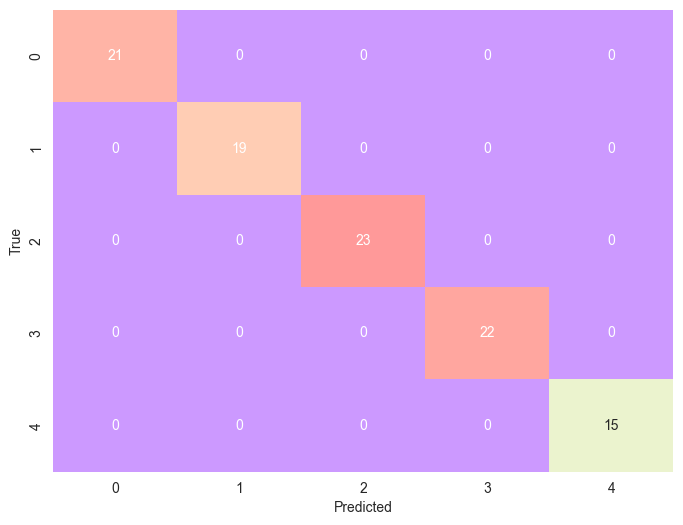

In [12]:
print(one_vs_all_nn.predict(x_test))
print(y_test)
print(one_vs_all_nn.evaluate(x_test, y_test))
acc, conf = one_vs_all_nn.evaluate(x_test, y_test, confusion_matrix=True)
print(acc)
visualization.plot_confusion_matrix(conf)

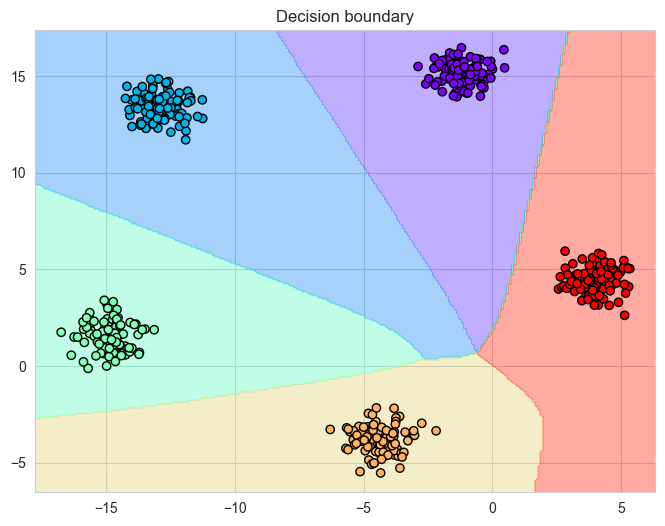

In [13]:
visualization.plot_decision_boundary(data, one_vs_all_nn, title='Decision boundary')

In [14]:
import utilities
X2,y2 = utilities.multiClass_Data(N=200,K=3)
# change the numbering of classes from 0,1,2 to 2,1,0
y2_temp = y2.copy()
# y2[y2_temp==0] = 2
# y2[y2_temp==1] = 0
# y2[y2_temp==2] = 1


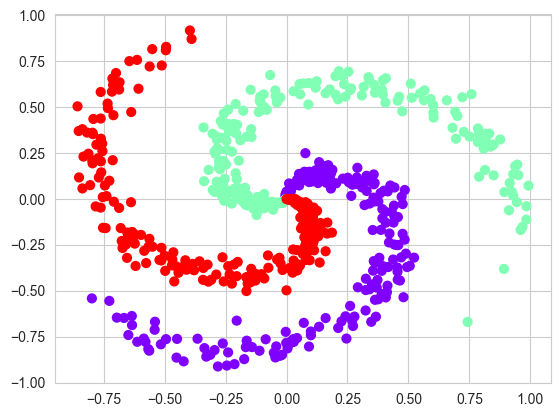

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=40, cmap=plt.cm.rainbow)
plt.show()
X2 = X2.T  # Reshaping as (n x m)
# Converting to one hot matrix
y2_hot = DNNClassifier.to_one_hot(y2, 3)

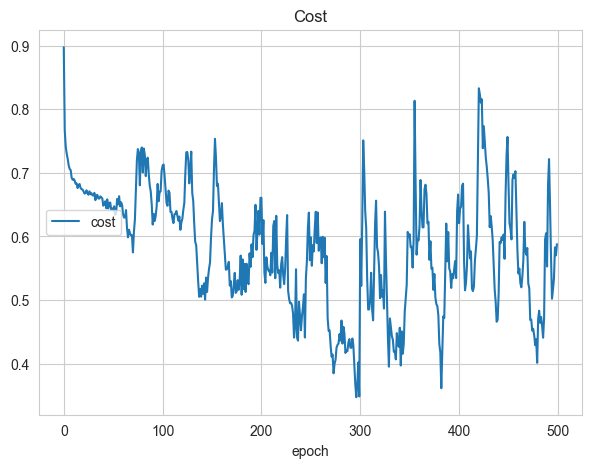

Cost after epoch 499: 0.5537495251542932


In [16]:

af2 = 'relu'
# layer_dims2 = [X2.shape[0],24,12,y2_hot.shape[0]]
# nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# a= nn2.train(X2, y2_hot, learning_rate=0.006, epochs = 4000, batch_size=50, print_cost = True)

# layer_dims2 = [X2.shape[0],12,6,y2_hot.shape[0]]
# nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.sigmoid])
# a= nn2.train(X2, y2_hot, learning_rate=0.06, epochs = 1000, batch_size=50, print_cost = True)

layer_dims2 = [X2.shape[0],64,32,y2_hot.shape[0]]
nn2 = DNNClassifier(layer_dims2, [DNNClassifier.relu,DNNClassifier.relu, DNNClassifier.softmax])
a= nn2.train(X2, y2_hot, learning_rate=0.06, epochs = 500, batch_size=10, print_cost = True)


(2, 600)
(600,)
(1, 600)


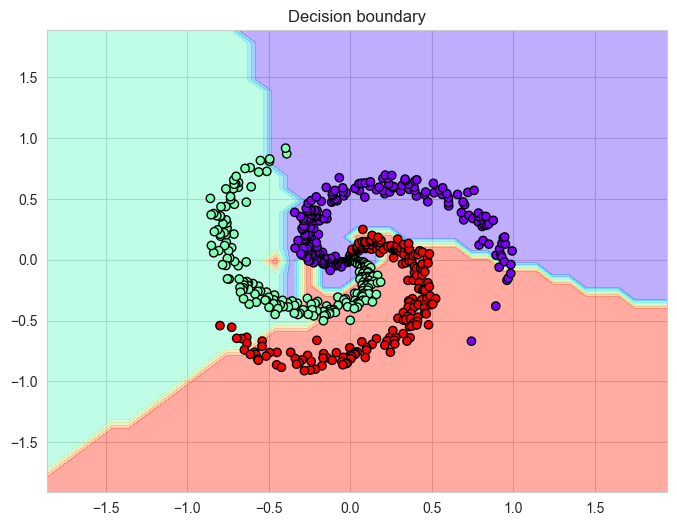

In [17]:
%matplotlib inline
print(X2.shape)
print(y2.shape)
y2[y2_temp==0] = 2
y2[y2_temp==1] = 0
y2[y2_temp==2] = 1
y22 = y2.reshape(1, y2.shape[0])
print(y22.shape)
# conbine X and y to matrix to plot
# x shape (600, 2)
# y shape (600, )
data = np.concatenate((X2.T, y22.T), axis=1)
visualization.plot_decision_boundary(data, nn2, title='Decision boundary')

In [18]:
a = np.array([[1, 2,5], [3, 4,5]])

b = np.array([[5, 6]])

print(a.shape)
print(b.shape)
print(np.concatenate((a, b.T), axis=1))

(2, 3)
(1, 2)
[[1 2 5 5]
 [3 4 5 6]]


In [19]:
print(data.shape)

(600, 3)
